In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime


# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")
sede_treat_0 = pd.read_csv("../../data/treat_0.csv")
sede_treat_1 = pd.read_csv("../../data/treat_1.csv")

sede_treat_0_1 = pd.read_csv("../../data/treat_0_1.csv")
sede_treat_0_2 = pd.read_csv("../../data/treat_0_2.csv")
sede_treat_1_1 = pd.read_csv("../../data/treat_1_1.csv")
sede_treat_1_2 = pd.read_csv("../../data/treat_1_2.csv")

In [2]:
df_topic_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            16100 non-null  object 
 1   tag             16100 non-null  object 
 2   q_count         16100 non-null  int64  
 3   treat           16100 non-null  int64  
 4   post            16100 non-null  int64  
 5   rel_day         16100 non-null  int64  
 6   rel_week        16100 non-null  int64  
 7   subreddit_name  9982 non-null   object 
 8   subs            9387 non-null   float64
 9   posts           8316 non-null   float64
 10  comments        9044 non-null   float64
 11  rel_month       16100 non-null  int64  
 12  treated         16100 non-null  int64  
 13  fect_id         16100 non-null  int64  
 14  ln_q_count      16100 non-null  float64
dtypes: float64(4), int64(8), object(3)
memory usage: 1.8+ MB


In [3]:
df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])

In [4]:
sede_treat_0_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cdate                87 non-null     object
 1   net                  87 non-null     int64 
 2   amazon_web_services  87 non-null     int64 
 3   android              87 non-null     int64 
 4   angular              87 non-null     int64 
 5   api                  87 non-null     int64 
 6   arrays               87 non-null     int64 
 7   azure                87 non-null     int64 
 8   c                    87 non-null     int64 
 9   c#                   87 non-null     int64 
 10  cplusplus            87 non-null     int64 
 11  css                  87 non-null     int64 
 12  dart                 87 non-null     int64 
 13  dataframe            87 non-null     int64 
 14  django               87 non-null     int64 
 15  docker               87 non-null     int64 
 16  excel     

In [5]:
sede_treat_0_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cdate                74 non-null     object
 1   net                  74 non-null     int64 
 2   amazon_web_services  74 non-null     int64 
 3   android              74 non-null     int64 
 4   angular              74 non-null     int64 
 5   api                  74 non-null     int64 
 6   arrays               74 non-null     int64 
 7   azure                74 non-null     int64 
 8   c                    74 non-null     int64 
 9   c#                   74 non-null     int64 
 10  cplusplus            74 non-null     int64 
 11  css                  74 non-null     int64 
 12  dart                 74 non-null     int64 
 13  dataframe            74 non-null     int64 
 14  django               74 non-null     int64 
 15  docker               74 non-null     int64 
 16  excel     

In [6]:
old_col = [ x for x in df_topic_day['tag'].unique()]
new_col = [ x.replace('.', '').replace('-', '_').replace('+', 'plus') for x in df_topic_day['tag'].unique()]

In [7]:
col_dict = { x.replace('.', '').replace('-', '_').replace('+', 'plus') :x for x in df_topic_day['tag'].unique()}

In [8]:
sede_treat = pd.concat([sede_treat_0_1, sede_treat_0_2, sede_treat_1_1, sede_treat_1_2], axis = 0)

In [9]:
sede_treat.columns[2:]

Index(['amazon_web_services', 'android', 'angular', 'api', 'arrays', 'azure',
       'c', 'c#', 'cplusplus', 'css', 'dart', 'dataframe', 'django', 'docker',
       'excel', 'firebase', 'flutter', 'html', 'ios', 'java', 'javascript',
       'jquery', 'json', 'kotlin', 'laravel', 'linux', 'list', 'mongodb',
       'mysql', 'nextjs', 'nodejs', 'numpy', 'pandas', 'php', 'postgresql',
       'python', 'python_3x', 'r', 'react_native', 'reactjs', 'spring',
       'spring_boot', 'sql', 'sql_server', 'swift', 'typescript', 'vba',
       'visual_studio_code', 'vuejs'],
      dtype='object')

In [10]:
col_dict

{'net': '.net',
 'amazon_web_services': 'amazon-web-services',
 'android': 'android',
 'angular': 'angular',
 'api': 'api',
 'arrays': 'arrays',
 'azure': 'azure',
 'c': 'c',
 'c#': 'c#',
 'cplusplus': 'c++',
 'css': 'css',
 'dart': 'dart',
 'dataframe': 'dataframe',
 'django': 'django',
 'docker': 'docker',
 'excel': 'excel',
 'firebase': 'firebase',
 'flutter': 'flutter',
 'html': 'html',
 'ios': 'ios',
 'java': 'java',
 'javascript': 'javascript',
 'jquery': 'jquery',
 'json': 'json',
 'kotlin': 'kotlin',
 'laravel': 'laravel',
 'linux': 'linux',
 'list': 'list',
 'mongodb': 'mongodb',
 'mysql': 'mysql',
 'nextjs': 'next.js',
 'nodejs': 'node.js',
 'numpy': 'numpy',
 'pandas': 'pandas',
 'php': 'php',
 'postgresql': 'postgresql',
 'python': 'python',
 'python_3x': 'python-3.x',
 'r': 'r',
 'react_native': 'react-native',
 'reactjs': 'reactjs',
 'spring': 'spring',
 'spring_boot': 'spring-boot',
 'sql': 'sql',
 'sql_server': 'sql-server',
 'swift': 'swift',
 'typescript': 'typescript

In [12]:
for col_nm in sede_treat.columns[2:] : 
    print(col_nm)
    print(col_dict[col_nm])
    sede_treat.rename(columns = {col_nm: col_dict[col_nm]}, inplace=True)


amazon_web_services
amazon-web-services
android
android
angular
angular
api
api
arrays
arrays
azure
azure
c
c
c#
c#
cplusplus
c++
css
css
dart
dart
dataframe
dataframe
django
django
docker
docker
excel
excel
firebase
firebase
flutter
flutter
html
html
ios
ios
java
java
javascript
javascript
jquery
jquery
json
json
kotlin
kotlin
laravel
laravel
linux
linux
list
list
mongodb
mongodb
mysql
mysql
nextjs
next.js
nodejs
node.js
numpy
numpy
pandas
pandas
php
php
postgresql
postgresql
python
python
python_3x
python-3.x
r
r
react_native
react-native
reactjs
reactjs
spring
spring
spring_boot
spring-boot
sql
sql
sql_server
sql-server
swift
swift
typescript
typescript
vba
vba
visual_studio_code
visual-studio-code
vuejs
vue.js


In [13]:
sede_treat.columns

Index(['cdate', 'net', 'amazon-web-services', 'android', 'angular', 'api',
       'arrays', 'azure', 'c', 'c#', 'c++', 'css', 'dart', 'dataframe',
       'django', 'docker', 'excel', 'firebase', 'flutter', 'html', 'ios',
       'java', 'javascript', 'jquery', 'json', 'kotlin', 'laravel', 'linux',
       'list', 'mongodb', 'mysql', 'next.js', 'node.js', 'numpy', 'pandas',
       'php', 'postgresql', 'python', 'python-3.x', 'r', 'react-native',
       'reactjs', 'spring', 'spring-boot', 'sql', 'sql-server', 'swift',
       'typescript', 'vba', 'visual-studio-code', 'vue.js'],
      dtype='object')

In [17]:
sede_treat = sede_treat.melt(id_vars = 'cdate', value_vars=sede_treat.columns[1:])

In [18]:
sede_treat.shape

(16100, 3)

In [19]:
sede_treat['cdate'] = pd.to_datetime(sede_treat['cdate'])

In [20]:
sede_treat.columns = ['cdate', 'sede_tag', 'sede_q_count']

In [26]:
sede_treat.loc[sede_treat['sede_tag'] =='net', 'sede_tag'] ='.net'

In [27]:
sede_treat

,cdate,sede_tag,sede_q_count
0,2021-10-12,.net,150
1,2021-10-13,.net,144
2,2021-10-26,.net,136
3,2021-10-27,.net,122
4,2021-11-13,.net,80
...,...,...,...
16095,2023-01-31,vue.js,52
16096,2023-02-15,vue.js,45
16097,2023-02-17,vue.js,45
16098,2023-03-04,vue.js,27


In [29]:
tt = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')

In [31]:
df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])
tt['date'] = pd.to_datetime(tt['date'])

In [32]:
# rel_week을 범주형 변수로 변환 (주차별 처리)
df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])
tt['rel_week'] = pd.Categorical(tt['rel_week'])

In [33]:
df_topic_day = df_topic_day.set_index(['tag', 'date'])
tt = tt.set_index(['tag', 'date'])

In [ ]:
# post와 treat 상호작용 변수 추가 (R의 i(post, ref=0):treat 대응)
# df_topic_day['post_treat'] = df_topic_day['post'] * df_topic_day['treat']

In [42]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_topic_day)
result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [43]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
tt_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=tt)
tt_result_dyn = tt_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
tt

In [35]:
# 동적 효과 계수 추출
coefs = result_dyn.params
std_errors = result_dyn.std_errors
conf_int = result_dyn.conf_int()

In [44]:
# 동적 효과 계수 추출
tt_coefs = tt_result_dyn.params
tt_std_errors = tt_result_dyn.std_errors
tt_conf_int = tt_result_dyn.conf_int()

In [36]:
periods = np.arange(-7, 15, 1)


In [38]:
coefs['C(rel_week)[T.14]:treat']
#     'C(rel_week)[T.14]:treat'

-28.911428571425265

In [39]:
coefs_filtered = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [45]:
tt_coefs_filtered = tt_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
tt_std_errors_filtered = tt_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [40]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period': periods,
    'Estimate': coefs_filtered,
    'll_95': ll_95,
    'ul_95': ul_95
})

In [46]:
# 신뢰구간 계산
tt_ll_95 = tt_coefs_filtered - 1.965 * tt_std_errors_filtered
tt_ul_95 = tt_coefs_filtered + 1.965 * tt_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
tt_df_coefs = pd.DataFrame({
    'period': periods,
    'Estimate': tt_coefs_filtered,
    'll_95': tt_ll_95,
    'ul_95': tt_ul_95
})

AttributeError: 'Axes' object has no attribute 'xticks'

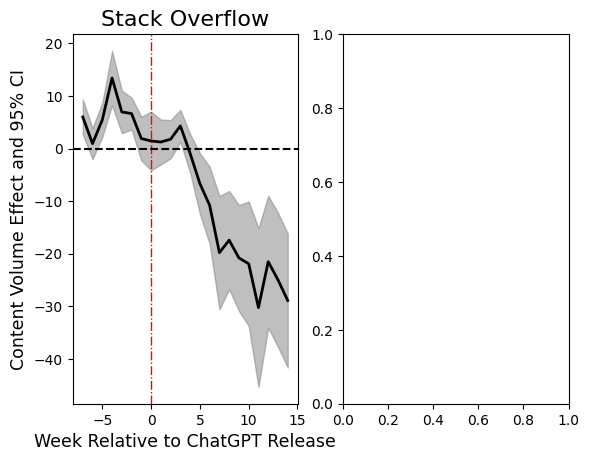

In [63]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 2)

axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12.5)
axs[0].set_title("Stack Overflow", fontsize=16)
axs[0].xticks(rotation=45)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)


axs[1].fill_between(tt_df_coefs['period'], tt_df_coefs['ll_95'], tt_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(tt_df_coefs['period'], tt_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 12.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 12.5)
axs[1].set_title("Stack Overflow", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

plt.show();

In [60]:
# Plot 그리기
plt.figure(1, 2, figsize=(10, 6))
plt.fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
plt.plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
plt.axvline(x=0, color='red', linestyle='-.', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--')

# 그래프 설정
plt.xlabel("Week Relative to ChatGPT Release", fontsize=14)
plt.ylabel("Content Volume Effect and 95% CI", fontsize=14)
plt.title("Stack Overflow", fontsize=16)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

TypeError: figure() got multiple values for argument 'figsize'